In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digit_mnist = keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test)=digit_mnist.load_data()

In [5]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

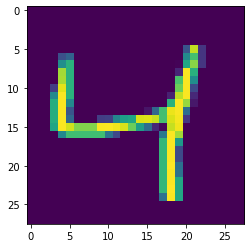

In [8]:
plt.imshow(x_train[2])

In [9]:
x_train=x_train/255
x_test=x_test/255

In [10]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [11]:
x_valid,x_train=x_train[:6000],x_train[6000:]
y_valid,y_train=y_train[:6000],y_train[6000:]

In [13]:
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

In [15]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(200,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

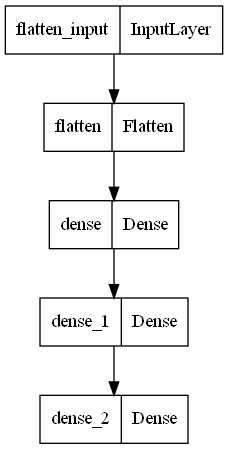

In [16]:
import pydot
keras.utils.plot_model(model)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [19]:
model_history=model.fit(x_train,y_train,epochs=60,validation_data=(x_valid,y_valid))

Epoch 1/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6607 - accuracy: 0.8267 - val_loss: 0.3216 - val_accuracy: 0.9125
Epoch 2/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3006 - accuracy: 0.9141 - val_loss: 0.2585 - val_accuracy: 0.9283
Epoch 3/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2488 - accuracy: 0.9292 - val_loss: 0.2254 - val_accuracy: 0.9383
Epoch 4/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2151 - accuracy: 0.9390 - val_loss: 0.1961 - val_accuracy: 0.9442
Epoch 5/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1893 - accuracy: 0.9461 - val_loss: 0.1790 - val_accuracy: 0.9483
Epoch 6/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1690 - accuracy: 0.9517 - val_loss: 0.1638 - val_accuracy: 0.9523
Epoch 7/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1521 - accuracy: 0.9569 - val_loss: 0.1482 - val_accuracy:

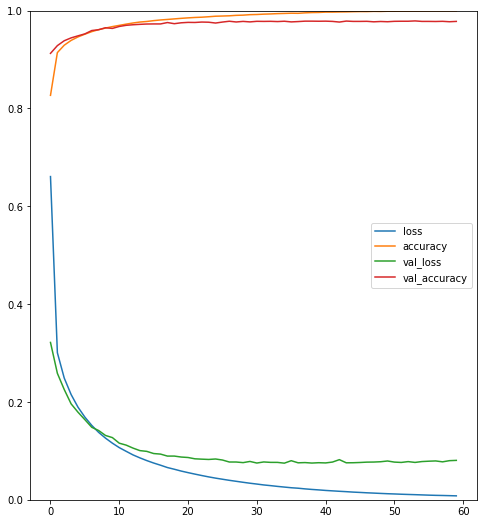

In [20]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,9))
plt.grid=True
plt.gca().set_ylim(0,1)
plt.show()

In [21]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.9791


[0.07409530878067017, 0.9790999889373779]

In [22]:
x_new=x_test[:5]

In [24]:
yprob=model.predict(x_new)
yprob

1/1 [==============================] - 0s 24ms/step


array([[1.10683075e-07, 1.85959670e-09, 1.56302292e-06, 5.27277625e-05,
        6.90834001e-10, 1.72813557e-07, 2.97761788e-13, 9.99936104e-01,
        6.73247996e-07, 8.69491760e-06],
       [1.70013481e-09, 5.87294608e-07, 9.99998093e-01, 1.27232090e-06,
        1.09293339e-15, 1.61000158e-10, 7.21288762e-09, 6.26785918e-17,
        1.14326255e-08, 7.44635846e-18],
       [1.14804482e-06, 9.99421239e-01, 8.40125085e-06, 1.65560016e-06,
        2.25069714e-04, 1.71489557e-06, 1.47603268e-05, 2.47878401e-04,
        7.71703781e-05, 1.09852056e-06],
       [9.99998927e-01, 4.19759516e-08, 3.13149087e-07, 1.31617872e-09,
        1.66872329e-08, 7.41535611e-10, 3.40740939e-07, 3.09842193e-07,
        3.51875994e-12, 1.55205839e-07],
       [7.53536426e-07, 1.23417472e-08, 1.19423591e-08, 1.19504573e-10,
        9.98842299e-01, 3.59868890e-09, 7.05002549e-07, 2.68756912e-06,
        2.44602461e-07, 1.15327153e-03]], dtype=float32)

In [25]:
y_pred=model.predict(x_new)

1/1 [==============================] - 0s 32ms/step


In [26]:
y_pred

array([[1.10683075e-07, 1.85959670e-09, 1.56302292e-06, 5.27277625e-05,
        6.90834001e-10, 1.72813557e-07, 2.97761788e-13, 9.99936104e-01,
        6.73247996e-07, 8.69491760e-06],
       [1.70013481e-09, 5.87294608e-07, 9.99998093e-01, 1.27232090e-06,
        1.09293339e-15, 1.61000158e-10, 7.21288762e-09, 6.26785918e-17,
        1.14326255e-08, 7.44635846e-18],
       [1.14804482e-06, 9.99421239e-01, 8.40125085e-06, 1.65560016e-06,
        2.25069714e-04, 1.71489557e-06, 1.47603268e-05, 2.47878401e-04,
        7.71703781e-05, 1.09852056e-06],
       [9.99998927e-01, 4.19759516e-08, 3.13149087e-07, 1.31617872e-09,
        1.66872329e-08, 7.41535611e-10, 3.40740939e-07, 3.09842193e-07,
        3.51875994e-12, 1.55205839e-07],
       [7.53536426e-07, 1.23417472e-08, 1.19423591e-08, 1.19504573e-10,
        9.98842299e-01, 3.59868890e-09, 7.05002549e-07, 2.68756912e-06,
        2.44602461e-07, 1.15327153e-03]], dtype=float32)

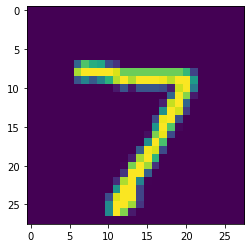

In [27]:
plt.imshow(x_test[0])

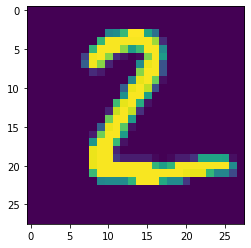

In [28]:
plt.imshow(x_test[1])

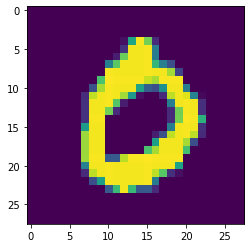

In [29]:
plt.imshow(x_test[3])

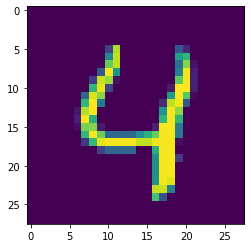

In [30]:
plt.imshow(x_test[4])

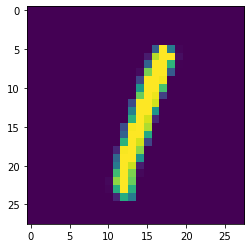

In [31]:
plt.imshow(x_test[5])

In [32]:
y_pred=model.predict_classes(x_new)

AttributeError: 'Sequential' object has no attribute 'predict_classes'